In [1]:
import os
from google.colab import drive
 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/Kaggle'

/content/gdrive/My Drive/Kaggle


In [3]:
!ls chest_xray

chest_xray  __MACOSX  test  train  val


In [4]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# setting the path and image size
IMAGE_SIZE = [224, 224]

train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [6]:
# useful for getting number of output classes
folders = glob('chest_xray/train/*')

In [7]:
folders

['chest_xray/train/NORMAL', 'chest_xray/train/PNEUMONIA']

In [8]:
##Not including the fuuly connected layers and not training the weights again
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 2s 0us/step


In [9]:
##Flattening and providing it to the output layer with sigmoid as activation
x = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)
model = Model(vgg.input,prediction)

In [10]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [11]:
##Compiling the model
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## Scaling the training images, doing some augmentation and setting the path for the training set to flow

In [12]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


##Doing only scaling on the test data and also setting the path

In [14]:
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [15]:
len(test_set)

20

In [16]:
# fit the model
final = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
163/163 [==============================] - 2895s 18s/step - loss: 0.2334 - accuracy: 0.9028 - val_loss: 0.5846 - val_accuracy: 0.7644
Epoch 2/2
163/163 [==============================] - 2505s 15s/step - loss: 0.1341 - accuracy: 0.9461 - val_loss: 0.2375 - val_accuracy: 0.9087


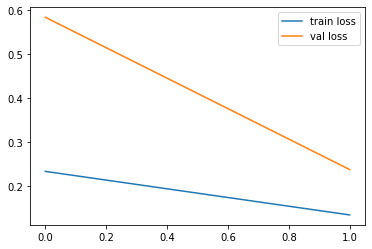

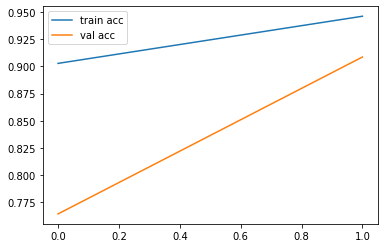

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(final.history['loss'], label='train loss')
plt.plot(final.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(final.history['accuracy'], label='train acc')
plt.plot(final.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
##Saving the model
from tensorflow.keras.models import load_model

model.save('modelvgg19_lung.h5')

In [19]:
y_pred = model.predict(test_set)

In [23]:
##Catogrizing the values into 0 and 1
def squash(pred):
  for i in range(len(pred)):
    if pred[i][0] > 0.5 :
      pred[i][0] = 1
    else:
      pred[i][0] = 0


In [24]:
squash(y_pred)  

In [27]:
y_pred

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],

## Testing on Images

Pneumonia


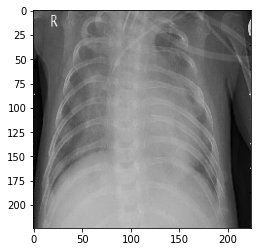

In [29]:
img = image.load_img("chest_xray/test/PNEUMONIA/person1_virus_9.jpeg",target_size=(224,224)) ##loading the image
img = np.asarray(img) ##converting to an array
img = img / 255 ##scaling by doing a division of 255
plt.imshow(img)
img = np.expand_dims(img, axis=0) ##expanding the dimensions
from keras.models import load_model
saved_model = load_model("modelvgg19_lung.h5") ##loading the model
output = saved_model.predict(img)
if output[0][0] > 0.5 :
    print("Pneumonia")
else:
    print('Normal')

Normal


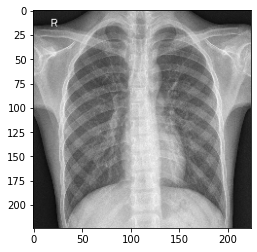

In [31]:
img1= image.load_img("chest_xray/test/NORMAL/IM-0005-0001.jpeg",target_size=(224,224)) ##loading the image
img1 = np.asarray(img1) ##converting to an array
img1 = img1 / 255 ##scaling by doing a division of 255
plt.imshow(img1)
img1 = np.expand_dims(img1, axis=0) ##expanding the dimensions
output = saved_model.predict(img1)
if output[0][0] > 0.5 :
    print("Pneumonia")
else:
    print('Normal')